<a href="https://colab.research.google.com/github/eunzzae/KaggleStudy_MustHave/blob/main/Chap06_%EB%8C%80%ED%9A%8C_%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC_%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter06. 자전거 대여 수요 예측

## 6-1) 경진대회 이해
* 본 대회는 플레이그라운드 대회이며, 보통 상금과 메달이 없는 경우가 많음   

  ※ 플레이그라운드 대회 : 난이도가 낮은 연습용 대회
---------------------------------------------------------------
* 피처와 타깃값이란??
  - 피처(독립변수, X) : 원하는 값을 예측하기 위해 활용하는 데이터
  - 타깃값(종속변수, Y) : 예측해야할 값(= 목푯값, 목표변수, 타깃변수)

## 6-2) 경진대회 접속 방법 및 세부메뉴
### ✅ 경진대회 접속 방법
1) 캐글 홈페이지 접속 → 2) 검색창에 대회명 입력 → 3) Competitions 영역 노출되는 대회 클릭

### ✅ 경진대회 메뉴 설명
* Overview
:경진대회 전반을 소개하는 메뉴
  - Description : 페이지에 경진대회 소개글 게재됨
  - Evaluation : 평가지표와 제출 형식 설명 → 등수 매기는데 사용됨
* Data : 하단의 Data Explorer 항목에서는 데이터를 미리 살펴볼 수 있음
* Code : 다른 참가자가 공유한 코드를 볼 수 있음
* Discussion : 인사이트, 주의사항, 질의응답 등 경진대회에 도움되는 내용이 게재됨
* Leaderboard : 참가자의 등수와 점수를 확인할 수 있음 \
* Rules : 대회 규정 게재
* Team : 팀 매칭

## 6-3)탐색적 데이터 분석

### ✅ 데이터 둘러보기
* 우선 데이터가 어떻게 구성되어 있는지 살펴보기

In [64]:
# 넘파이, 판다스 import
import numpy as np
import pandas as pd

In [65]:
# 데이터 경로
data_path = '/content/drive/MyDrive/[캐글] 스터디_musthave/Chap06. 자전거_대여_수요_예측/'

In [66]:
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [67]:
# 훈련데이터와 테스트 데이터 크기 확인
train.shape, test.shape

((10886, 12), (6493, 9))

* 피처 의미
  - datetime : 기록일시
  - holiday(공휴일 여부 0과 1)
  - weather(1:맑음, 2:옅은 안개,약간흐림, 3:약간의 눈, 약간의 비, 천둥번개,흐림, 4:폭우와 천둥번개, 눈과 짙은 안개)
  - temp : 실제 온도
  - atemp : 체감 온도
  - casual : 등록되지 않은 사용자 수(비회원 수)
  - count : 자전거 대여 수량 => **예측해야할 타깃값**


In [68]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* 테스트 데이터는 피처 수가 훈련 데이터보다 적음   
→ 훈련 데이터로 모델 훈련 후, 테스트 데이터로 대여 수량(count) 예측

  ※ 훈련 시에도 casual과 registered 피처를 제거해서 동일한 피처로 훈련

In [69]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


* ID인 datetime은 데이터를 구분하는 역할   
→ 훈련 시 datetime 피처 제거

In [70]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [71]:
train.info()  # 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### ✅ 피처 엔지니어링

* Raw data 상태에서는 경향, 공통점, 차이 등을 찾기 어려울 수 있음  
→ 분석, 시각화 하기에 적합하도록 피처 변환

* datetime은 Object 타입  
→ 문자열처럼 다룰 수 있음

In [73]:
print(train['datetime'][100]) # datetime 100번째 원소
print(train['datetime'][100].split()) # 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[1]) # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [74]:
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[0].split("-")) # "-" 기준으로 문자열 나눈기
print(train['datetime'][100].split()[0].split("-")[0]) # 연도
print(train['datetime'][100].split()[0].split("-")[1]) # 월
print(train['datetime'][100].split()[0].split("-")[2]) # 일

2011-01-05
['2011', '01', '05']
2011
01
05


In [75]:
print(train['datetime'][100].split()[1]) # 시간
print(train['datetime'][100].split()[1].split(":")) # ":" 기준으로 문자열 나눈기
print(train['datetime'][100].split()[1].split(":")[0]) # 시간
print(train['datetime'][100].split()[1].split(":")[1]) # 분
print(train['datetime'][100].split()[1].split(":")[2]) # 초

09:00:00
['09', '00', '00']
09
00
00


* 새로운 피처 생성

In [76]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

* 모델을 훈련할 때는 피처값을 숫자로만 변경  
→ 머신러닝은 피처를 숫자로만 인식하기 때문   
단, 아래에서는 그래프로 쉽게 알아보기 위해 요일 피처를 문자열로 변경

In [77]:
from datetime import datetime # datetime 라이브러리 임포트
import calendar

print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
# 정수로 요일 반환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
# 문자열로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])


2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [78]:
train['weekday'] = train['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [79]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear',
                                         2: 'Mist, Few clouds',
                                         3: 'Light Snow, Rain, Thunderstrom',
                                         4: 'Heavy Rain, Thunderstorm, Snow, Flog'})

* season, weather, date, hour 피처 추가
* season, weather 피처는 숫자에서 문자로 변환  
⇒  date 피처는 year, month, day 피처에도 있어서 제거함
month 피처는 더 큰 분류인 season으로 분류하므로 제거함


In [80]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


### ✅ 데이터 시각화


In [81]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### ✏️ 분포도  
: 수치형 데이터의 집계값을 나타내는 그래프   
※ 집계값: 총 개수 또는 비율

* 해석  
→ 타깃값이 0 근처로 편향되어 있음, 좋은 성능을 내기 어려워 보임  
회귀모델이 좋은 성능을 내기 위해서는 데이터가 정규분포를 따라야 함.

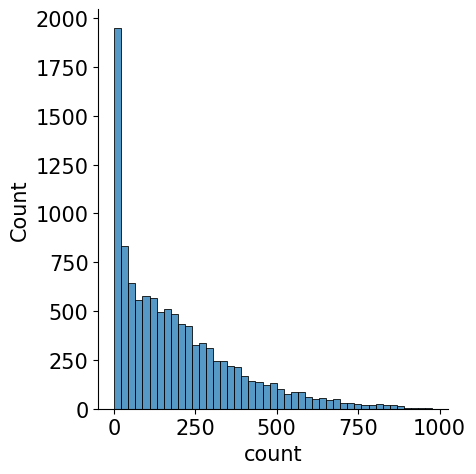

In [82]:
mpl.rc('font', size = 15) # 폰트 크기를 15로 설정
sns.displot(train['count']) # 분포도 출력

* log변환 → 데이터 분포를 정규분포에 가깝게 만듦   
  ⇒ 타깃값을 log(count)로 변환해서 사용하고, 마지막에(후처리) 지수변환하여 count로 복원

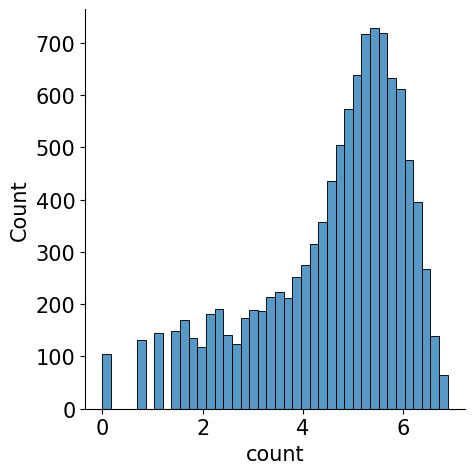

In [83]:
sns.displot(np.log(train['count']));

#### ✏️ 막대 그래프

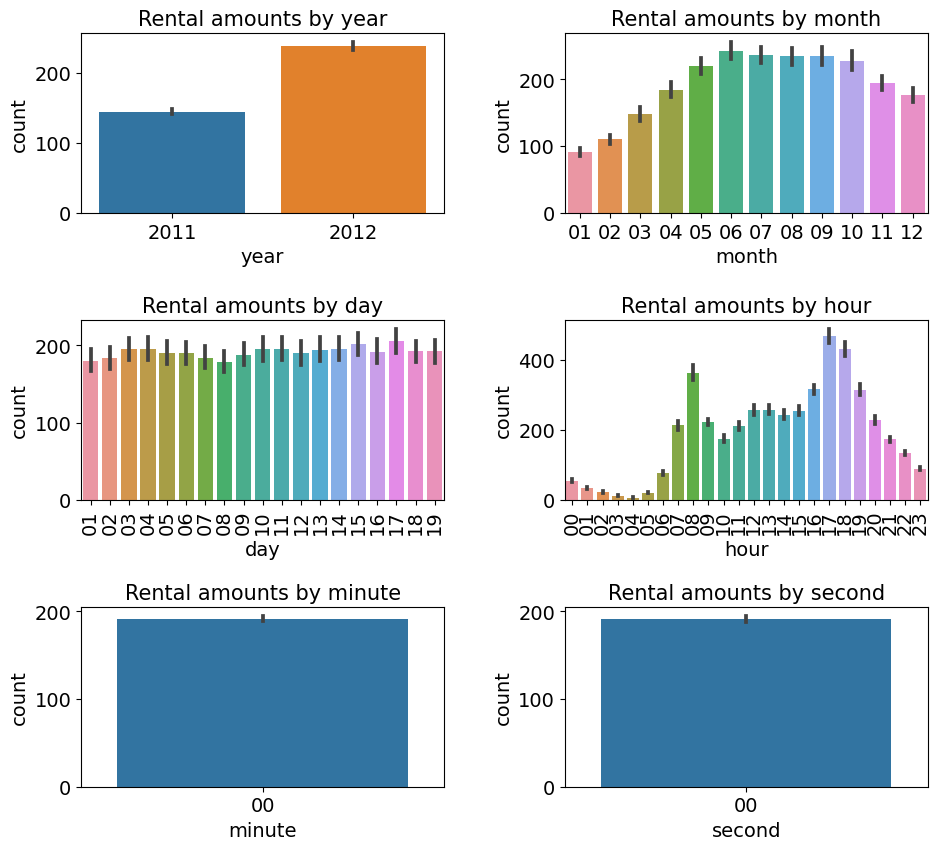

In [84]:
# 1) m행 n열 Figure 준비하기
mpl.rc('font', size=14)                       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)                  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성
plt.tight_layout()                            # 그래프 사이에 여백 확보
figure.set_size_inches(10, 9)                 # 전체 Figure 크기를 10X9인치로 설정

# 2) 각 축에 서브플롯 할당
# 연도, 월, 일, 시간, 분 초별 평균 대여 수량 막대 그래프
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 3) (선택) 세부설정 = 제목추가
axes[0,0].set(title = 'Rental amounts by year')
axes[0,1].set(title = 'Rental amounts by month')
axes[1,0].set(title = 'Rental amounts by day')
axes[1,1].set(title = 'Rental amounts by hour')
axes[2,0].set(title = 'Rental amounts by minute')
axes[2,1].set(title = 'Rental amounts by second')

# 4) (선택) 세부설정 = 서브플롯들의 x축 라벨 90도 회전
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

#### ✏️ 박스플롯  
: 범주형 데이터에 따른 수치형 데이터 정보를 나타내는 그래프

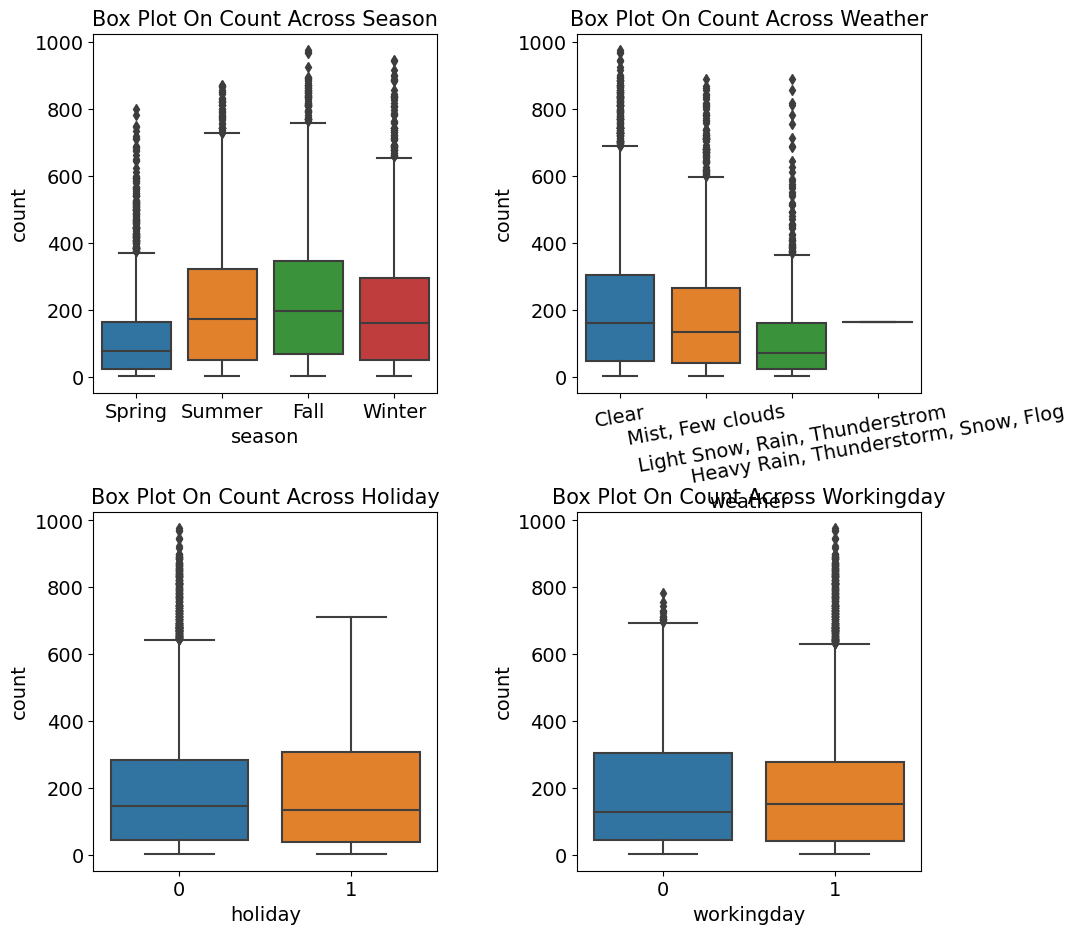

In [85]:
# 1) m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2)  # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 2) 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0,0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0,1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1,0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1,1])

# 3) 세부 설정 - 제목
axes[0,0].set(title='Box Plot On Count Across Season')
axes[0,1].set(title='Box Plot On Count Across Weather')
axes[1,0].set(title='Box Plot On Count Across Holiday')
axes[1,1].set(title='Box Plot On Count Across Workingday')

# 4) 세부 설정 - X축 회전
axes[0,1].tick_params(axis='x', labelrotation=10) # 10도 회전

#### ✏️ 포인트플롯  
: 범주형 데이터에 따른 수치형 데이터의 `평균`과 `신뢰구간`을 점과 선으로 표시   
- 장점 : 한 화면에 여러 그래프를 그려 비교하기 쉬움  

<Axes: xlabel='hour', ylabel='count'>

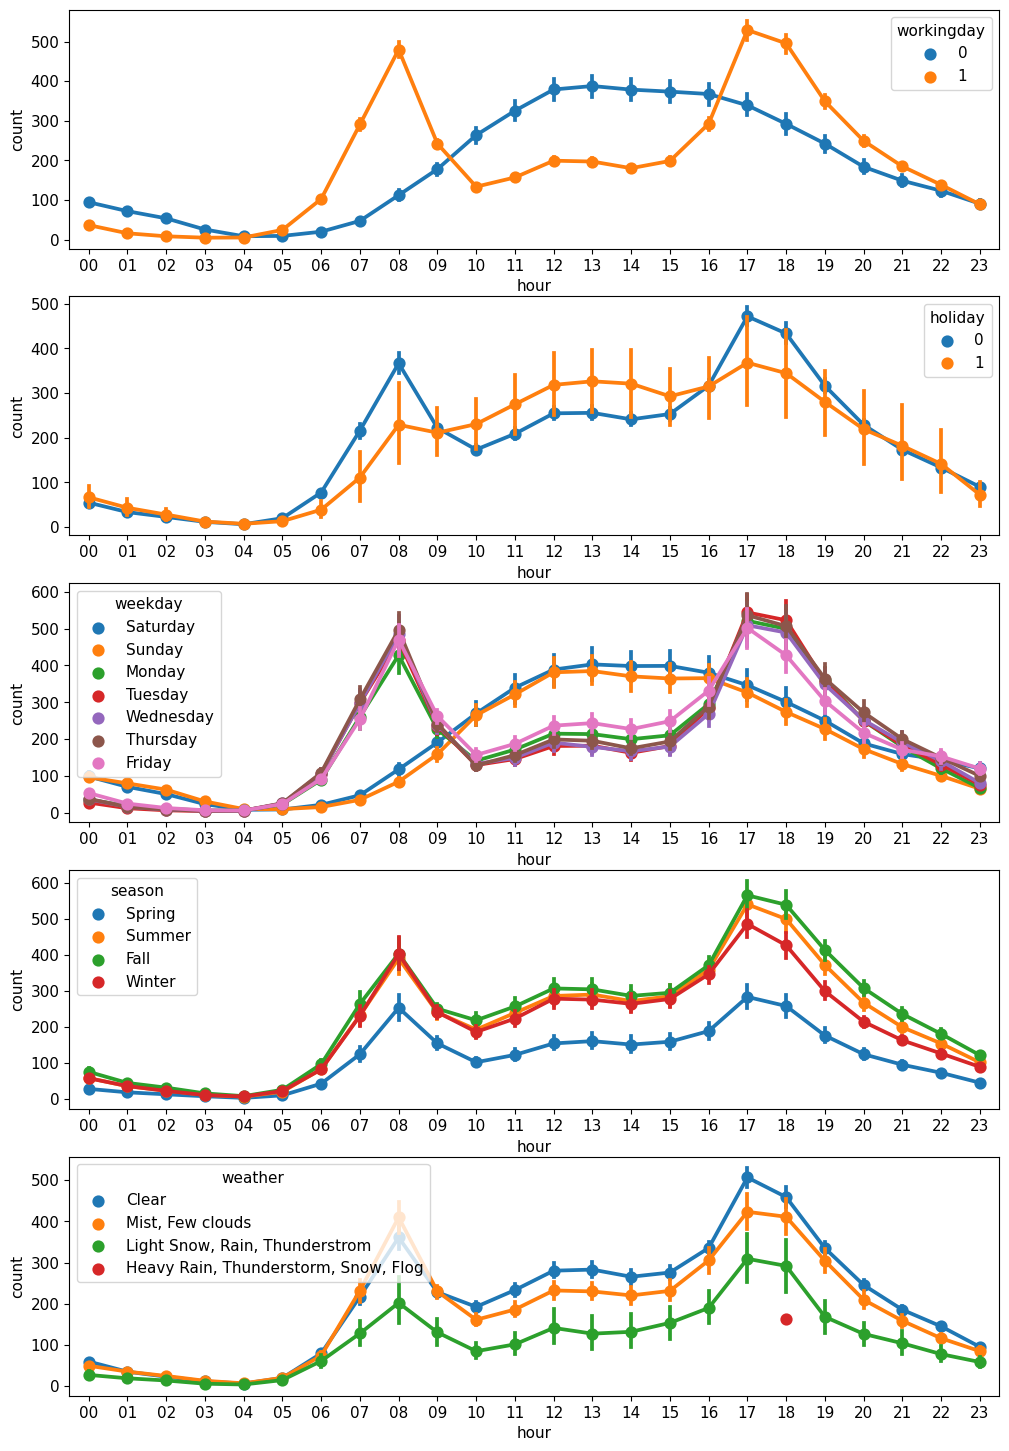

In [86]:
# 1) m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows = 5) # 5행 1열
figure.set_size_inches(12, 18)

# 2) 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날시에 따른 시간대별 평균 대여 수량
sns.pointplot(x='hour', y='count', data=train, hue = 'workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue = 'holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue = 'weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue = 'season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue = 'weather', ax=axes[4])

#### ✏️ 회귀선을 포함한 산점도 그래프  
: 수치형 데이터 간 상관관계 파악

[결과]
* windspeed 결측값으로 풍속과 대여 수량의 상관관계 파악 힘듦 -> windspeed 피처 제거 필요

<Axes: xlabel='humidity', ylabel='count'>

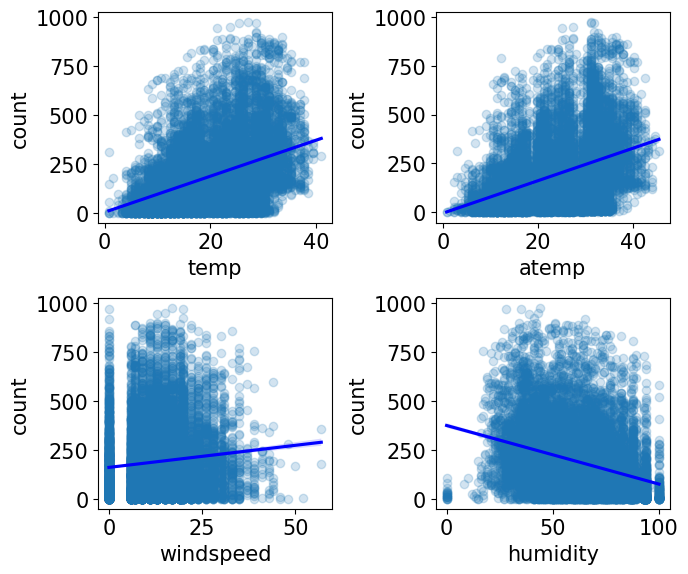

In [87]:
# 1) m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)  # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 2) 서브플롯 할당
# 온도, 체감온도, 풍속, 습도별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0],
            scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1],
            scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0],
            scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1],
            scatter_kws={'alpha': 0.2}, line_kws={'color':'blue'})

#### ✏️ 히트맵
: 데이터 간 관계를 색상으로 표현하여, 여러 데이터를 비교하기 쉬움 → 수치형 데이터끼리 상관관계 파악  

※ 타깃값(count)과의 상관관계 중요  
⇒ windspeed는 상관관계가 매우 약하므로, 피처 제거해도 괜찮음

In [88]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

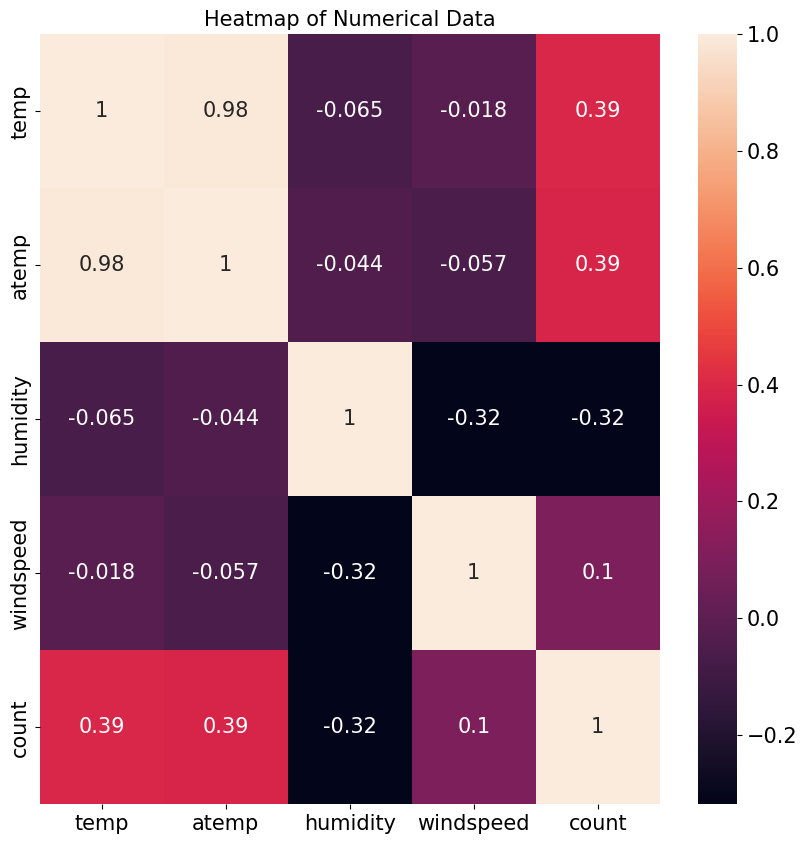

In [89]:
# 피처 간 상관관계 매트릭스
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data')

## 6-4) 베이스라인 모델  
: 가장 기본적인 모델  

### ✅ 피처 엔지니어링  
: 데이터를 변환하는 작업  → 훈련 데이터와 테스트 데이터에 공통 적용해야하기 때문에 피처 엔지니어링 전 데이터 합쳤다가 후에 나눠줌  

#### ✏️ 이상치 제거

In [114]:
# 데이터 경로
data_path = '/content/drive/MyDrive/[캐글] 스터디_musthave/Chap06. 자전거_대여_수요_예측/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

In [115]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

#### ✏️ 데이터 합치기  
 → 기존 인덱스가 꼬일 수 있으므로, 원래 인덱스를 무시하고 이어붙여줌

In [116]:
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [117]:
all_data = pd.concat([train, test], ignore_index =True) # 원래 데이터의 인덱스를 무시하고 이어붙이기
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


#### ✏️ 파생 피처(변수) 추가

In [118]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])

# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])

# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])

# 시간 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])

# 요일 피처 생성
all_data['weekday'] = all_data['date'].apply(lambda dateString: datetime.strptime(dateString, "%Y-%m-%d").weekday())

#### ✏️ 필요 없는 피처 제거

In [119]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'month', 'windspeed']
all_data = all_data.drop(drop_features, axis=1)

#### ✏️ 데이터 나누기  
* 타깃값 O - 훈련 데이터
* 타깃값 X - 테스트 데이터

In [120]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값

In [121]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


### ✅ 평가지표 계산 함수 작성  
: 훈련이 제대로 이루어졌는지 확인하려면 대상 능력을 평가할 수단이 필요 - 평가지표

In [122]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
  # 지수 변환
  if convertExp:
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)

  # 로그변환 후 결측값을 0으로 변환
  log_true = np.nan_to_num(np.log(y_true+1))
  log_pred = np.nan_to_num(np.log(y_pred+1))

  # RMSLE 계산
  output = np.sqrt(np.mean((log_true - log_pred)**2))
  return output

### ✅ 모델 훈련  
-> 선형 회귀 모델을 훈련한다   
= 독립변수(피처) X_train과 종속변수(타깃값) log_y에 대응하는 최적의 선형 회귀 계수를 구하는 것   

[참고]
* 훈련 : 피처(독립변수)와 타깃값(종속변수)이 주어졌을 때, 최적의 가중치(회귀계수)를 찾는 과정
* 예측 : 최적의 가중치를 아는 상태(훈련된 모델)에서 새로운 독립변수(데이터)가 주어졌을 때 타깃값 추정하는 과정  
* 탐색적 데이터 분석 : 예측에 도움이 될 피처를 추리고, 적절한 모델링 방법을 탐색하는 과정
* 피처 엔지니어링 : 추려진 피처들을 훈련에 적합하도록, 성능 향상에 도움되도록 가공하는 과정

In [123]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [124]:
log_y = np.log(y) # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

### ✅ 모델 성능 검증  
* 제출하기 전까지 테스트 데이터로 RMSLE를 구현할 수 없음 ⇒ 테스트 데이터에는 실제 타깃값이 없기 때문

이런 경우 훈련 데이터를 훈련용과 검증용으로 나누어 훈련하고 훈련된 모델의 성능을 평가함

In [125]:
preds = linear_reg_model.predict(X_train)

In [126]:
print(f'선형 회귀의 RMSLE 값 : {rmsle(log_y, preds, True): .4f}')

선형 회귀의 RMSLE 값 :  1.0205


### ✅ 예측 및 결과 제출
1) 테스트 데이터로 예측한 결과를 이용해야 함  
2) 예측한 값에 지수변환을 해줘야 함

In [127]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds) # 지수변환
submission.to_csv('submission.csv', index=False) # 파일로 저장

## 6.5 성능개선 1 : 릿지 회귀 모델
: L2 규제를 적용한 선형 회귀 모델

규제 = 모델이 훈련 데이터에 과대적합(overfitting) 되지 않도록 해주는 방법
참고 : 사이킷런 제공 모델 (릿지 Ridge, 라쏘 Lasso, 랜덤포레스트 Random forest회귀)

### ✅ 하이퍼파라미터 최적화
* 그리드서치 : 하이퍼파라미터를 격자처럼 촘촘하게 순회하며, 최적의 하이퍼파라미터 값을 찾는 기법  
 (하이퍼파라미터를 적용한 모델마다 교차 검증하여 성능을 측정하고 최적의 성능을 나타낸 하이퍼파라미터 값 도출)

#### ✏️ 모델 생성

In [128]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
ridge_model = Ridge()

#### ✏️ 그리드서치 객체 생성

1) 비교 검증해 볼 하이퍼파라미터 값 목록  
2) 대상 모델  
3) 교차 검증용 평가 수단(평가 함수)  

[ GridSearchCV() 주요 파라미터]
* estimator : 분류 및 회귀 모델
* param_grid : 딕셔너리 형태로 모델의 하이퍼파라미터명과 여러 하이퍼파라미터 값 지정
* scoring : 평가지표
* cv : 교차 검증 분할개수 (기본값 5)

In [131]:
# 하이퍼파라미터 값 목록
ridge_params = {'max_iter' : [3000], 'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model, # 릿지 모델
                                      param_grid=ridge_params, # 값 목록
                                      scoring=rmsle_scorer, # 평가 지표
                                      cv=5)                 # 교차 검증 분할 수

#### ✏️ 그리드서치 수행

In [132]:
log_y = np.log(y) # 타깃값 로그 변환
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [133]:
print('최적 하이퍼파라미터:', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터: {'alpha': 0.1, 'max_iter': 3000}


### ✅ 성능 검증

In [134]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True) : .4f}')

릿지 회귀 RMSLE 값 :  1.0205


## 6.5 성능개선 2 : 라쏘 회귀 모델  
성능이 좋지 않아 잘 쓰지 않음  

### ✅ 하이퍼파라미터 최적화(모델 훈련)

In [144]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()

# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter' : [3000], 'alpha' : lasso_alpha}

# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)

log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터:', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터: {'alpha': 0.00125, 'max_iter': 3000}



### ✅ 성능 검증

In [145]:
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True): .4f}')

라쏘 회귀 RMSLE 값 :  1.0205


## 6.5 성능개선 3 : 랜덤 포레스트 회귀 모델  
: 훈련 데이터를 랜덤하게 샘플링한 모델 n개를 각각 훈련하여 결과를 평균하는 방법

### ✅ 하이퍼파라미터 최적화(모델 훈련)

In [146]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()

# 그리드서치 객체 생성
rf_params = {'random_state': [42], 'n_estimators': [100,120,140]}
gridsearch_random_forest_model = GridSearchCV(estimator = randomforest_model,
                                              param_grid = rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)

# 그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)
print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


* 릿지와 라쏘 모델의 RMSLE값은 모두 1.02 -> 0.1127으로 가장 성능이 좋아짐

### ✅ 모델 성능 검증

In [147]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True) : .4f}')

랜덤 포레스트 회귀 RMSLE 값 :  0.1127


### ✅ 예측 및 결과제출

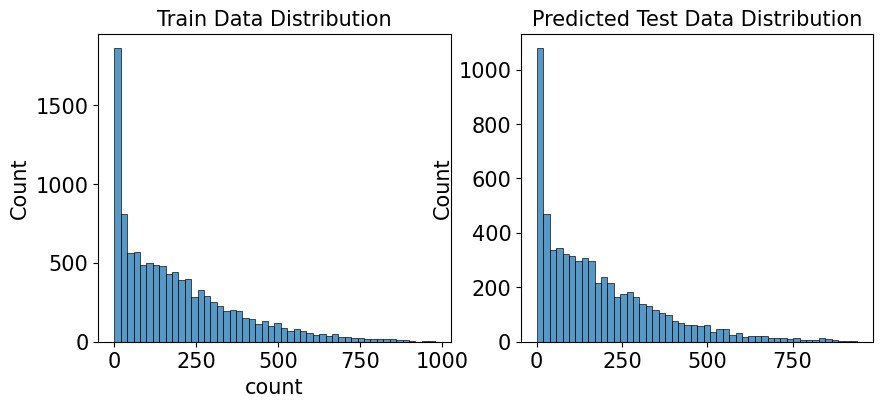

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [149]:
submission['count'] = np.exp(randomforest_preds) # 지수변환
submission.to_csv('submission.csv', index=False)